In [81]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


def initialize(size):
    L=size
    # Initialize the lattice with spins down (-1)
    lattice = -np.ones((L, L), dtype=int)
    # Set the middle 10x10 spins to be up (+1)
    lattice[5:15, 5:15] = 1
    return lattice


def deltaU(array,x,y):
    l = array.shape[0]-1
    if x == 0: top = array[l,y] 
    else: top = array[x-1,y]
    if x == l: bottom = array[0,y]
    else: bottom = array[x+1,y]
    if y == 0: left = array[x,l]
    else: left = array[x,y-1]
    if y == l: right = array[x,0]
    else: right = array[x,y+1]
    return 2*array[x,y]*(top+bottom+left+right)

def simulate(T,N=10**3):
    size = 20
    img = initialize(size)
    for i in range(N):
        x = np.random.randint(0, size)
        y = np.random.randint(0, size)
        delta = deltaU(img,x,y)
        if delta <= 0:
            img[x,y] = -img[x,y]
        else:
            if np.random.random() < np.exp(-delta/T):
                img[x,y] = -img[x,y]
        if i == N-1:
            return list(img)

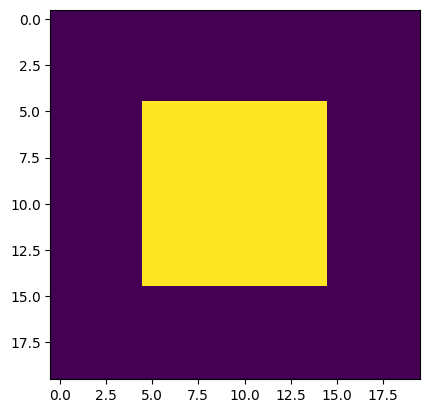

In [86]:
fig, ax = plt.subplots()
ax.imshow(initialize(20))

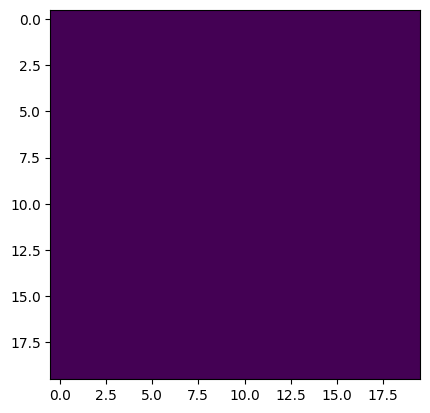

In [82]:
fig, ax = plt.subplots()
ax.imshow(simulate(T=1,N=10**5))

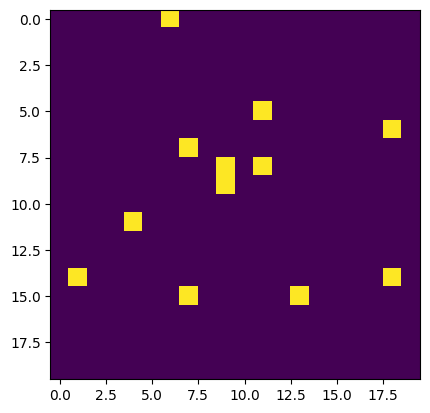

In [83]:
fig, ax = plt.subplots()
ax.imshow(simulate(T=2,N=10**5))

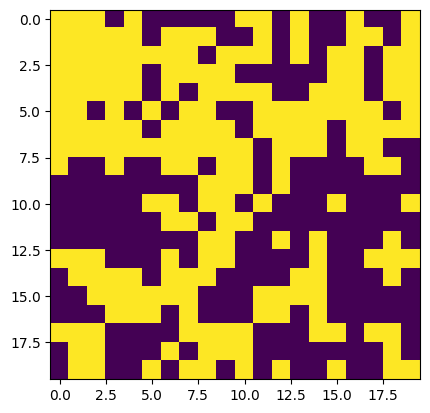

In [84]:
fig, ax = plt.subplots()
ax.imshow(simulate(T=4,N=10**5))

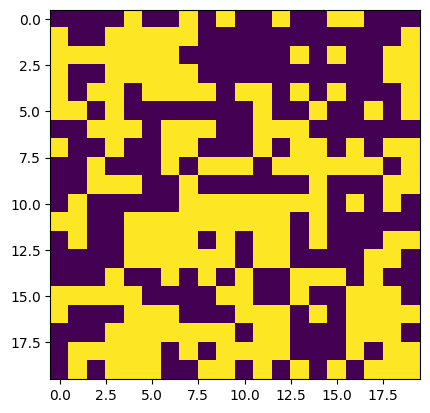

In [85]:
fig, ax = plt.subplots()
ax.imshow(simulate(T=10,N=10**5))

# Find Curie Temperature

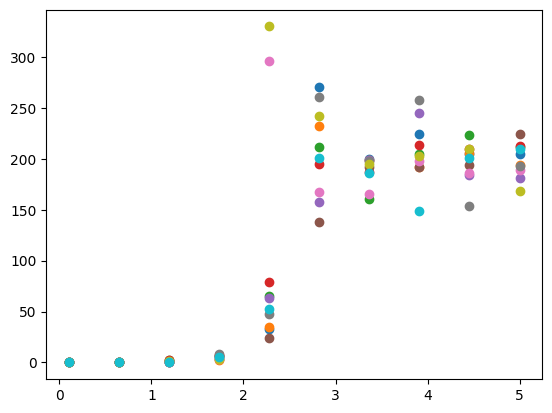

In [80]:
from itertools import chain


for j in range(10):
    res=[]
    num=10
    temperature=np.linspace(0.1,5,num)
    for t in temperature:
        count = sum(1 for x in chain.from_iterable(simulate(T=t,N=10**5)) if x == 1)
        res.append(count)
    plt.scatter(temperature,res)

According to the theory, $T_c$ should be 2.27 $\text{J/k}_B$, which matches well with the simulation.